In [5]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# Formatação dos gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
# Formatando os labels dos gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

### Carregando e Explorando os Dados

In [8]:
# Carregando os dados
dados = pd.read_csv(r'C:\Users\user\Documents\website_user_forecasting\data\dataset.csv', header=None)

In [9]:
# Visualizando os dados
dados.head()

,0,1
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [10]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'usuários_ativos']

In [11]:
# Visualizando os dados
dados.head()

,mes,usuários_ativos
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [12]:
# Shape dos dados
dados.shape

(144, 2)

In [13]:
# Tipos dos dados
dados.dtypes

mes                object
usuários_ativos     int64
dtype: object

In [14]:
# Tipo do objeto
type(dados)

pandas.core.frame.DataFrame

In [15]:
# Resumo estatístico da variável usuários_ativos. A média é de 280
dados.describe()

,usuários_ativos
count,144.000000
mean,280.416667
std,119.825543
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [16]:
# Mês com o maior número de usuários ativos
dados.max()

mes                2024-12
usuários_ativos        622
dtype: object

In [17]:
4# Coletando o período completo da série temporal
print('Inicio do Período de tempo: {}\nFinal do Período de tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Inicio do Período de tempo: 2013-01
Final do Período de tempo: 2024-12


### Processamento e Visualização dos Dados

In [18]:
# Visualizando os Dados
dados.head()

,mes,usuários_ativos
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128


In [19]:
# Tipos de Dados
dados.dtypes

mes                object
usuários_ativos     int64
dtype: object

In [20]:
# Convertendo a coluna data de object para datetime
dados['mes'] = pd.to_datetime(dados['mes'], format= '%Y-%m')

In [21]:
# Tipos de Dados
dados.dtypes

mes                datetime64[ns]
usuários_ativos             int64
dtype: object

In [22]:
# Visualizando os Dados
dados.head()

,mes,usuários_ativos
0,2013-01-01,110
1,2013-02-01,121
2,2013-03-01,135
3,2013-04-01,127
4,2013-05-01,128


In [23]:
# Transformando a coluna data no indice do conjunto de dados
dados_serie = dados.set_index('mes')

In [24]:
# Visualizando os dados
dados_serie.head()

,usuários_ativos
mes,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128


In [25]:
# Visualizando o indice
dados_serie.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [26]:
# Verificando valores nulos
dados_serie.isnull().sum()

usuários_ativos    0
dtype: int64

In [27]:
type(dados_serie)

pandas.core.frame.DataFrame

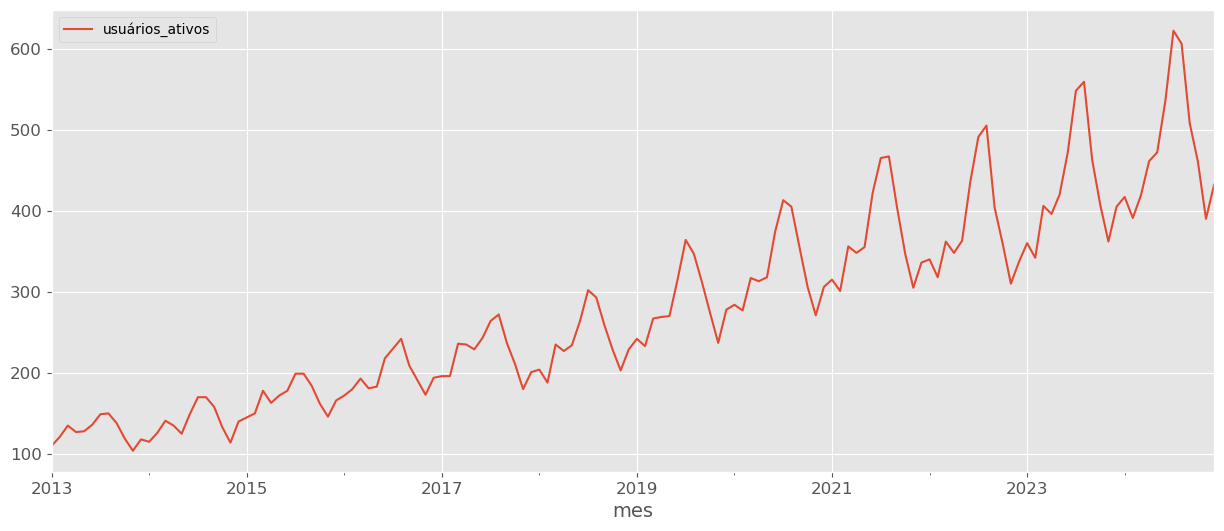

In [28]:
# Plot da série temporal - Observando algumas tendências
dados_serie.plot(figsize=(15, 6))
plt.show()

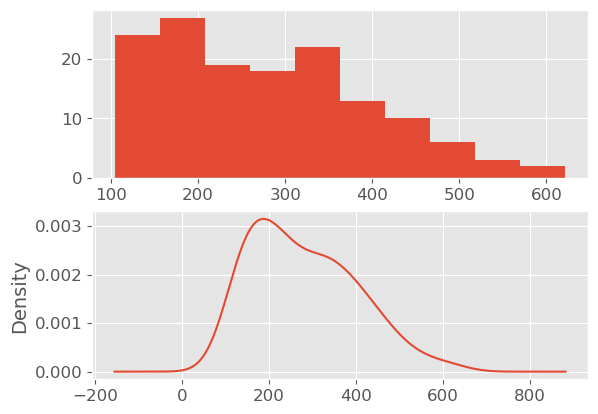

In [29]:
# Gráfico de Densidade

#Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.usuários_ativos.hist()

# Subplot 2
plt.subplot(212)
dados_serie.usuários_ativos.plot(kind='kde')
plt.show()

Text(0, 0.5, '\nUsuários Ativos')

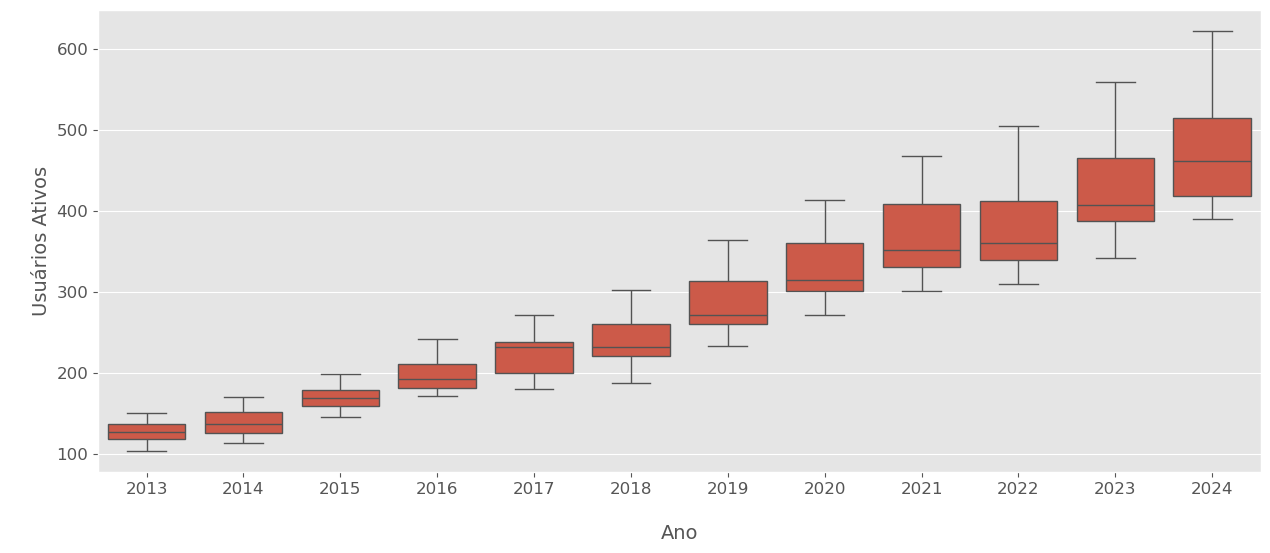

In [30]:
# Define a área de plotagem para os subplots (Os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis
indice_ano = dados_serie.usuários_ativos.index.year
valor = dados_serie.usuários_ativos

# Cria um box plot para cada ano usando o Seaborn (Esta extraindo o ano (year) do índice da série)
sns.boxplot(x=indice_ano, y = valor, ax= ax, data= dados_serie)

plt.xlabel('\nAno')
plt.ylabel('\nUsuários Ativos')

### Visualizando a Decomposição da série temporal

In [31]:
# Decomposição Multiplicativa
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie,
                                                        model= 'multiplicative',
                                                        extrapolate_trend= 'freq')

In [32]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

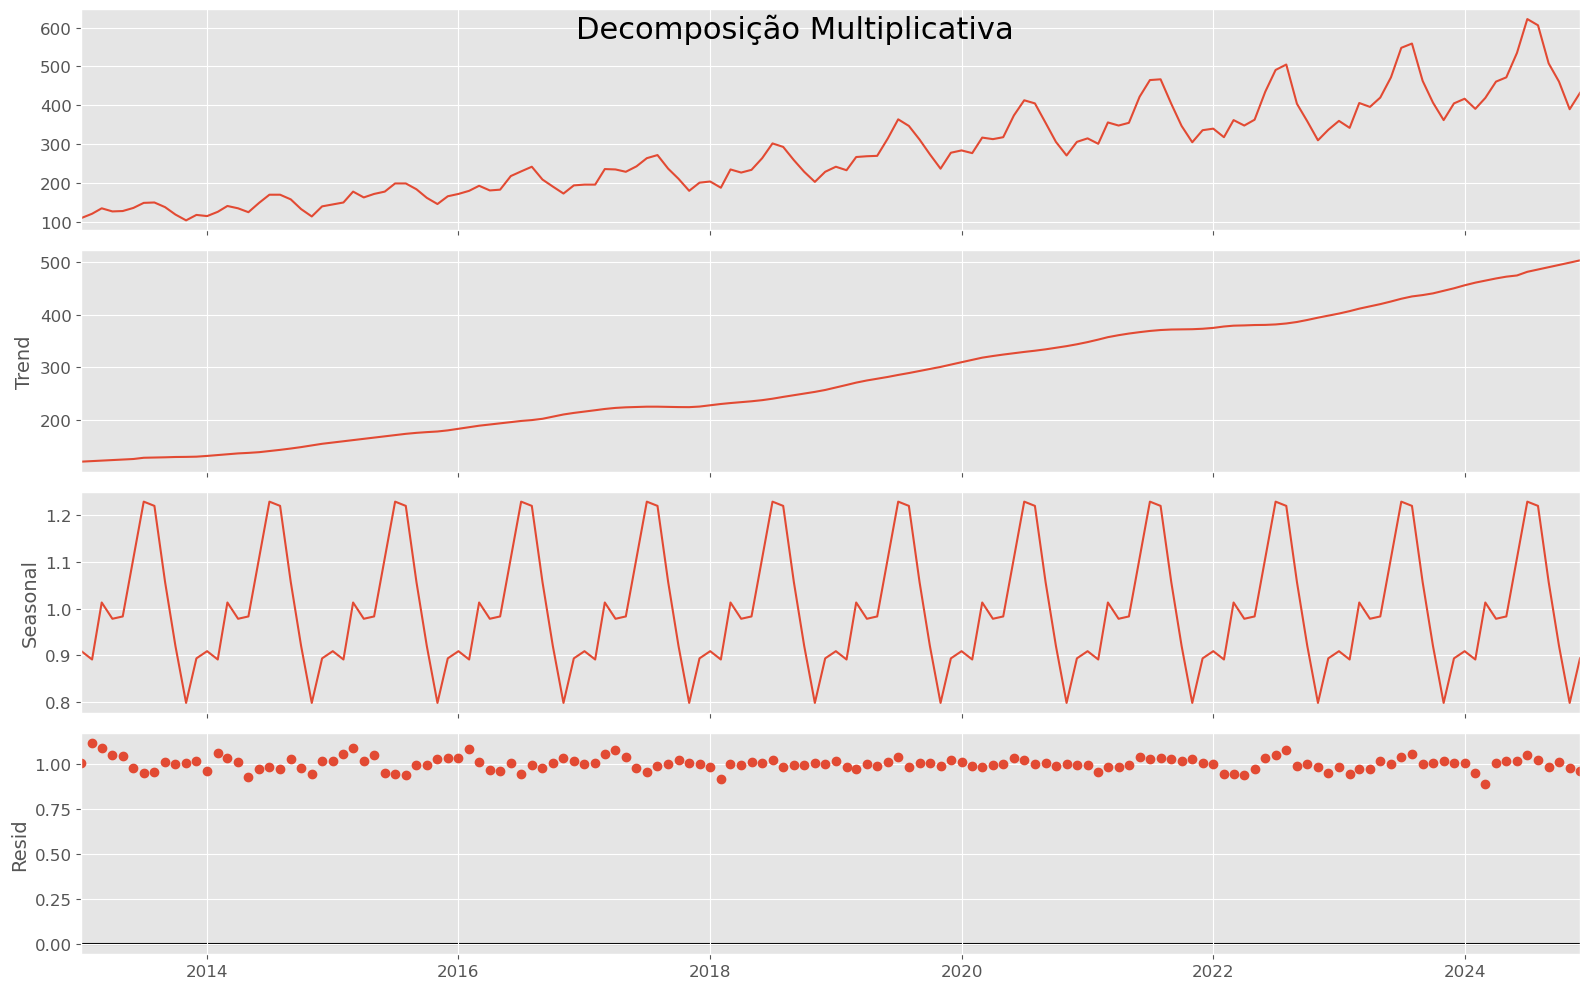

In [34]:
# plot
plt.rcParams.update({'figure.figsize': (16, 10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()